## Abalone Case Study
Given is the attribute name, attribute type, the measurement unit and a brief description. 
The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

we have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [2]:
#Importing librarires
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline #To Do : Inline Priting of Visualizations 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [13]:
#importing dataset 
df = pd.read_csv('abalone.csv')
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
#Features of the dataset 
df.shape

(4177, 9)

In [15]:
# Null values
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [18]:
# Data and datypes  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [21]:
# Sex colums is object type , lets check what are the distinct values  
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

According to the Infomation:
1)Dosen't contan Null data
2) Features 
    1 Object Type 
        M    1528
        I    1342
        F    1307
    7 Float Type with conitniuos data
4)Label- Int Type

In [23]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [24]:
#Data Manipulation 
from sklearn.preprocessing import LabelEncoder
lab_enc =LabelEncoder()
# Categorical data will not have any outliers 

df['Sex']  = lab_enc.fit_transform(df['Sex'])
 # feature encoding complete completed       

In [25]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


VISUAISATION
 1. Histogram
 2. Drisitnbution plot 

We will  ignore Sex and Rings for EDA

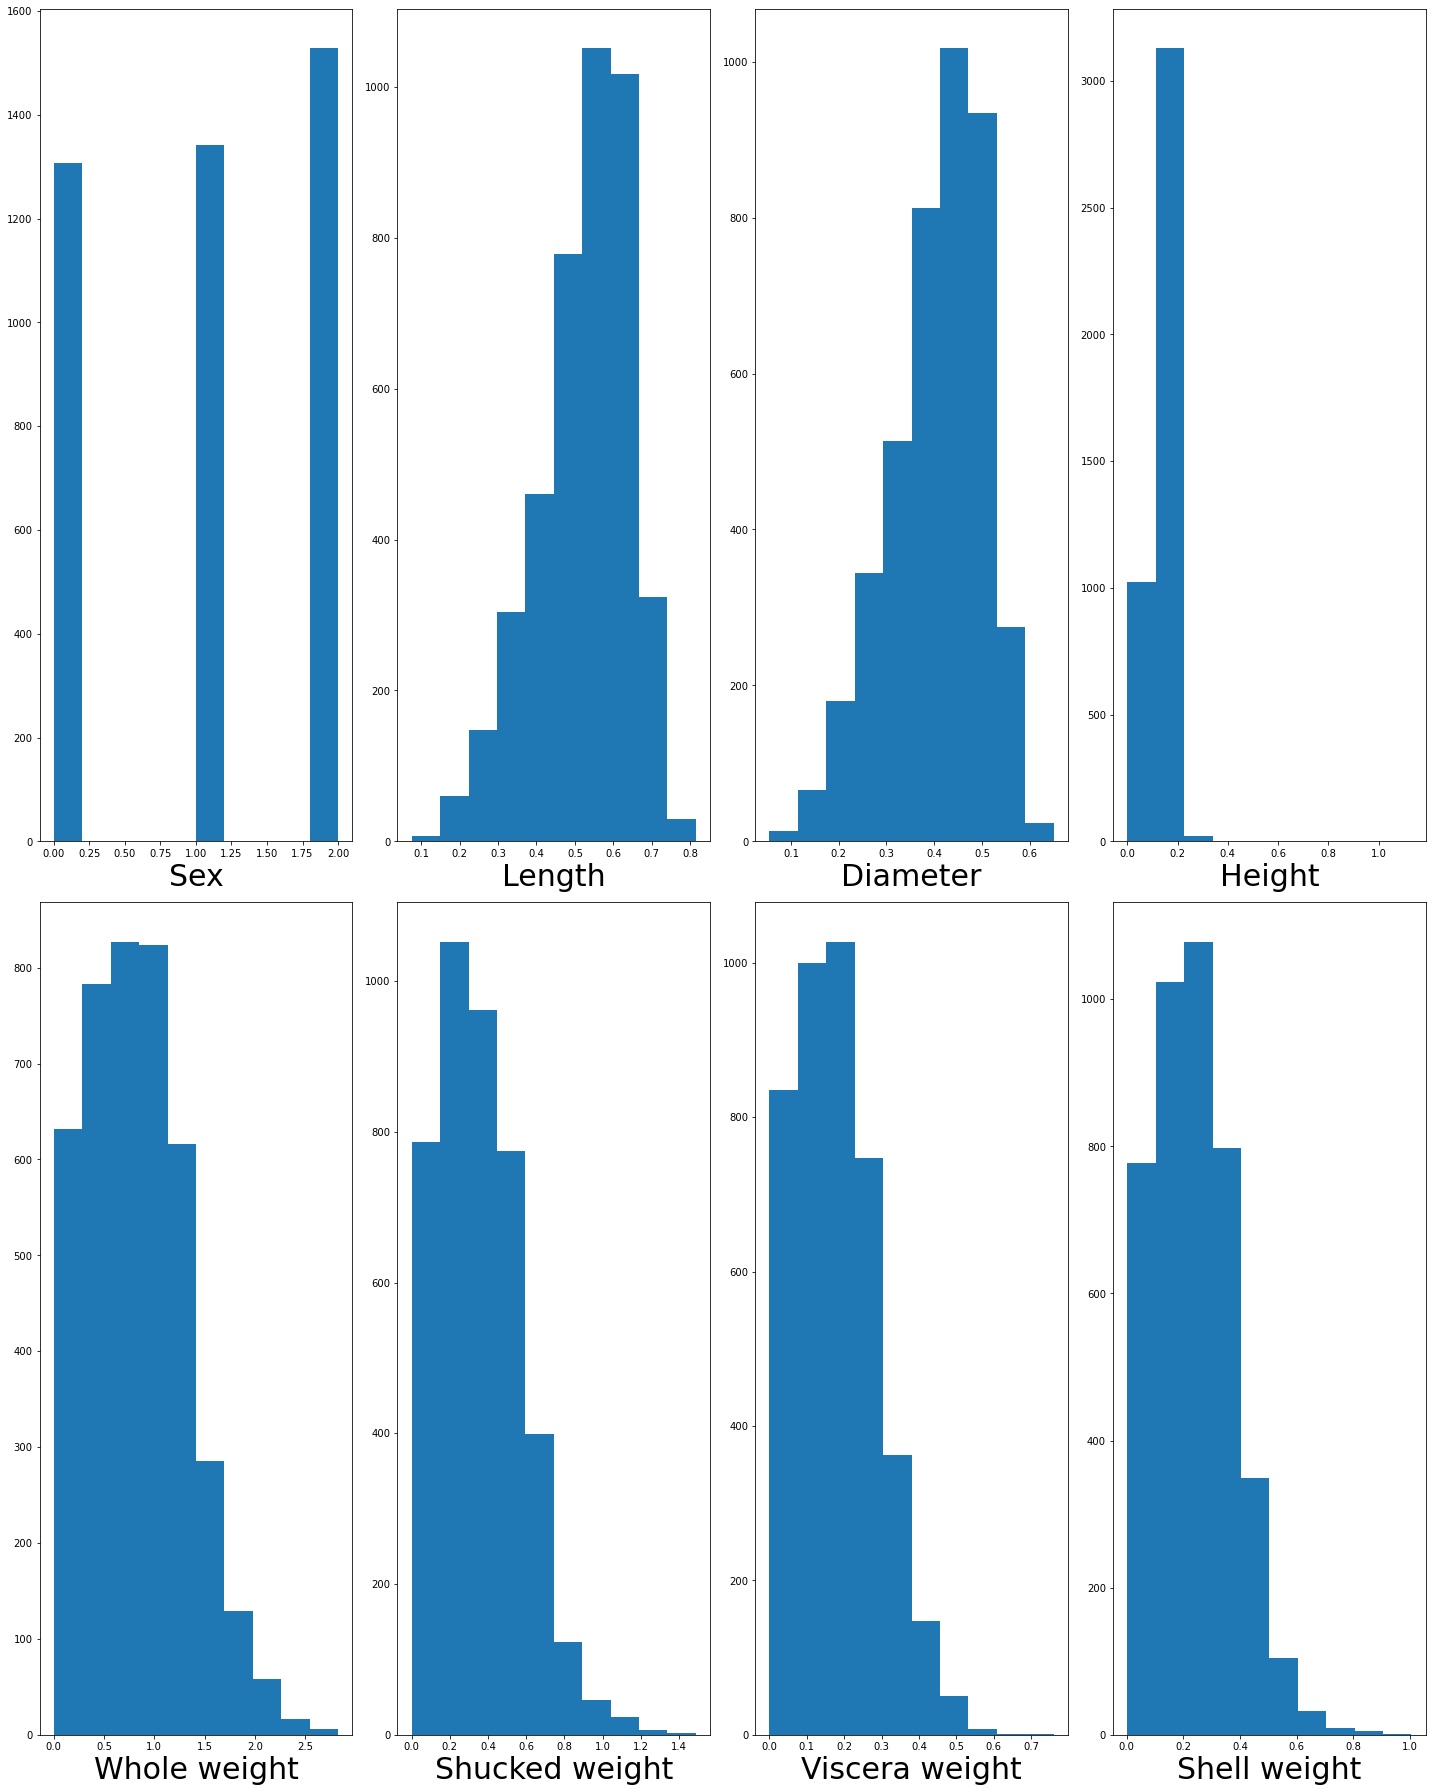

In [46]:
#HistPLot
plt.figure(figsize=(20,25))
plt_num=1
for plot in df :
    if plt_num<=8 :
        ax= plt.subplot(2,4,plt_num)
        plt.hist(df[plot])
        plt.xlabel(plot,fontsize=30)
    plt_num+=1
plt.tight_layout()

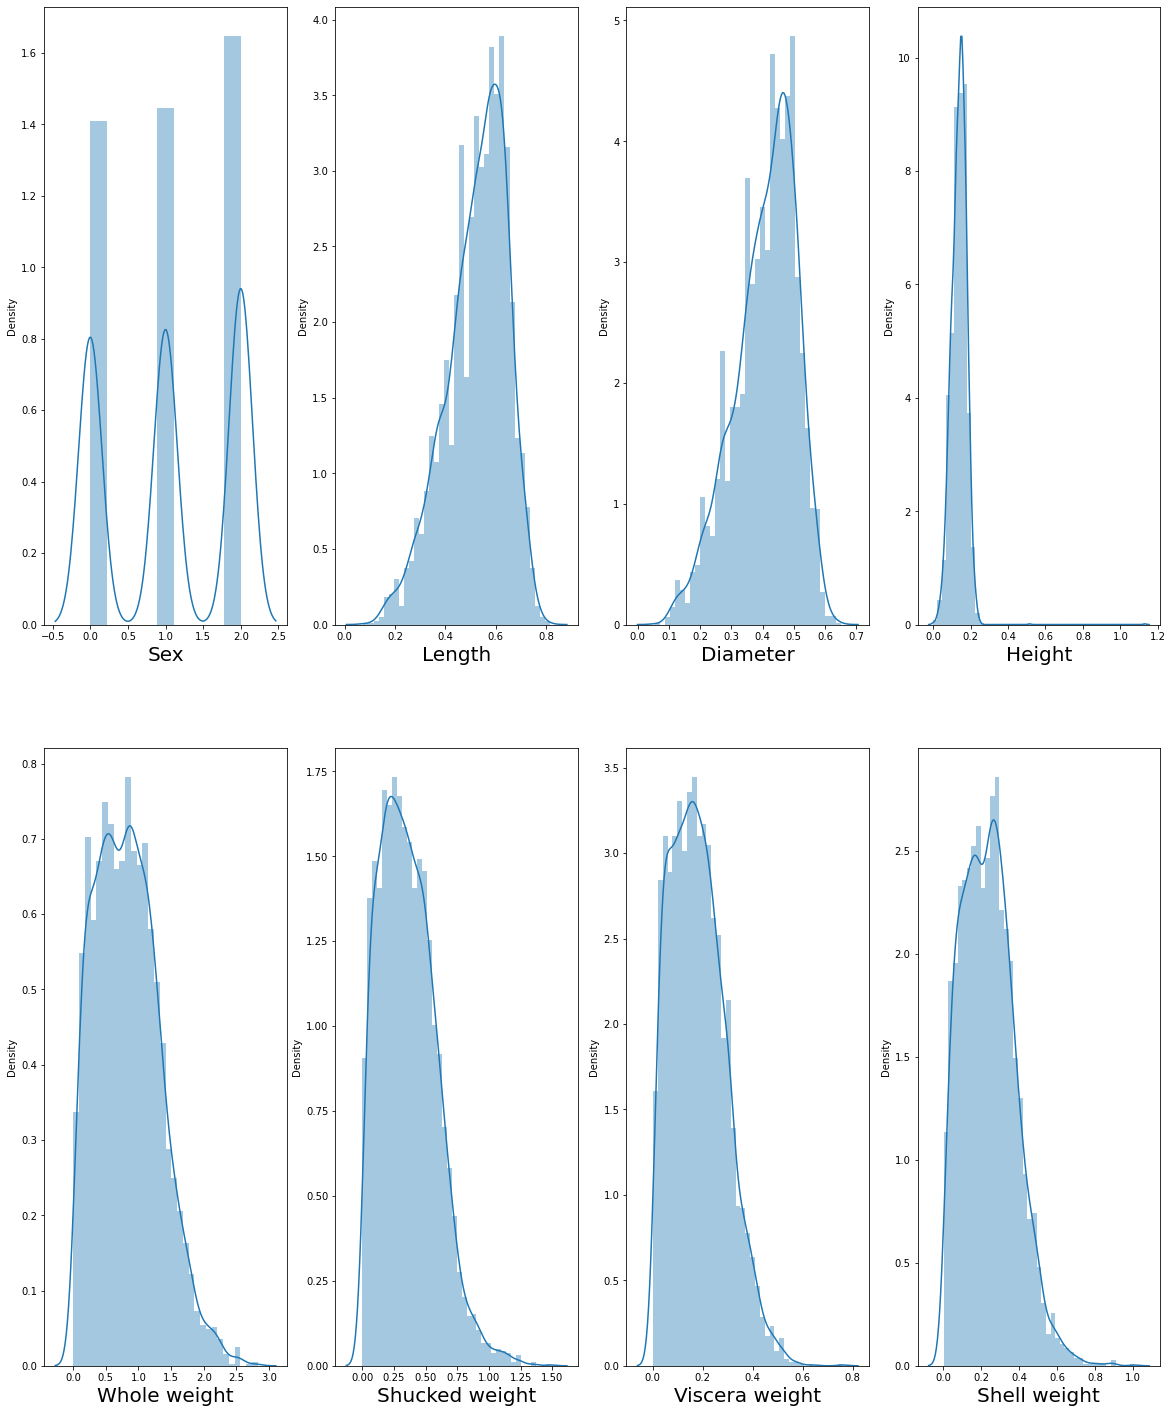

In [38]:
#Distplot 
plt.figure(figsize=(20,25))
plt_num=1
for plot in df :
    if plt_num<=8 :
        ax= plt.subplot(2,4,plt_num)
        sns.distplot(df[plot])
        plt.xlabel(plot,fontsize=20)
    plt_num+=1
plt.show()

DATA is skewed

Features are not Normally Distributed and have different Scale

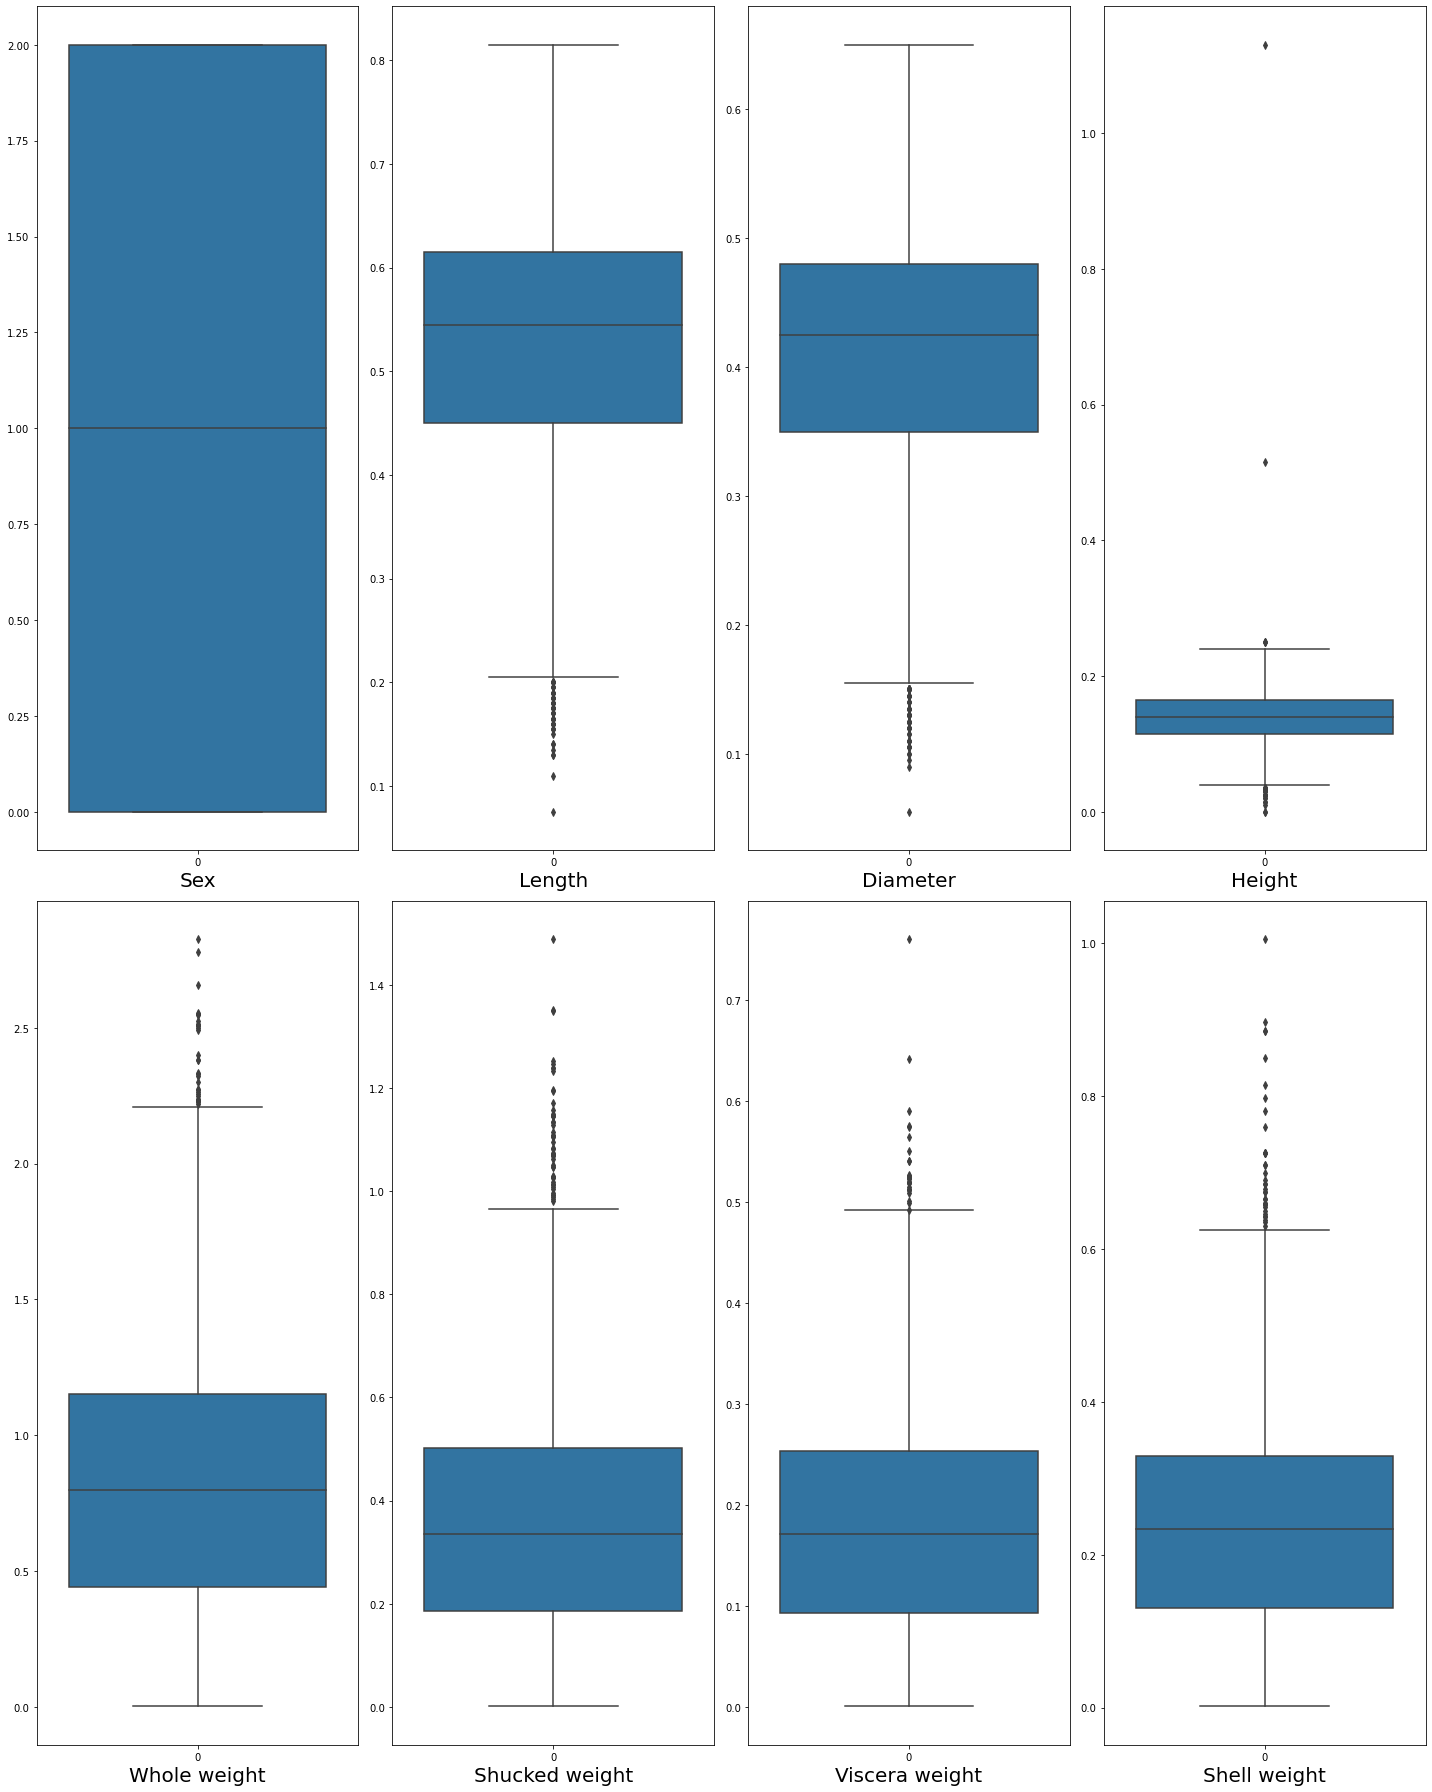

In [105]:
plt.figure(figsize=(20,25))
plt_num=1
for plot in df :
    if plt_num<=8 :
        ax= plt.subplot(2,4,plt_num)
        sns.boxplot(data = df[plot],orient='v')
        plt.xlabel(plot,fontsize=20)
    plt_num+=1
plt.tight_layout()

 and also have outliers as per Boxplots 

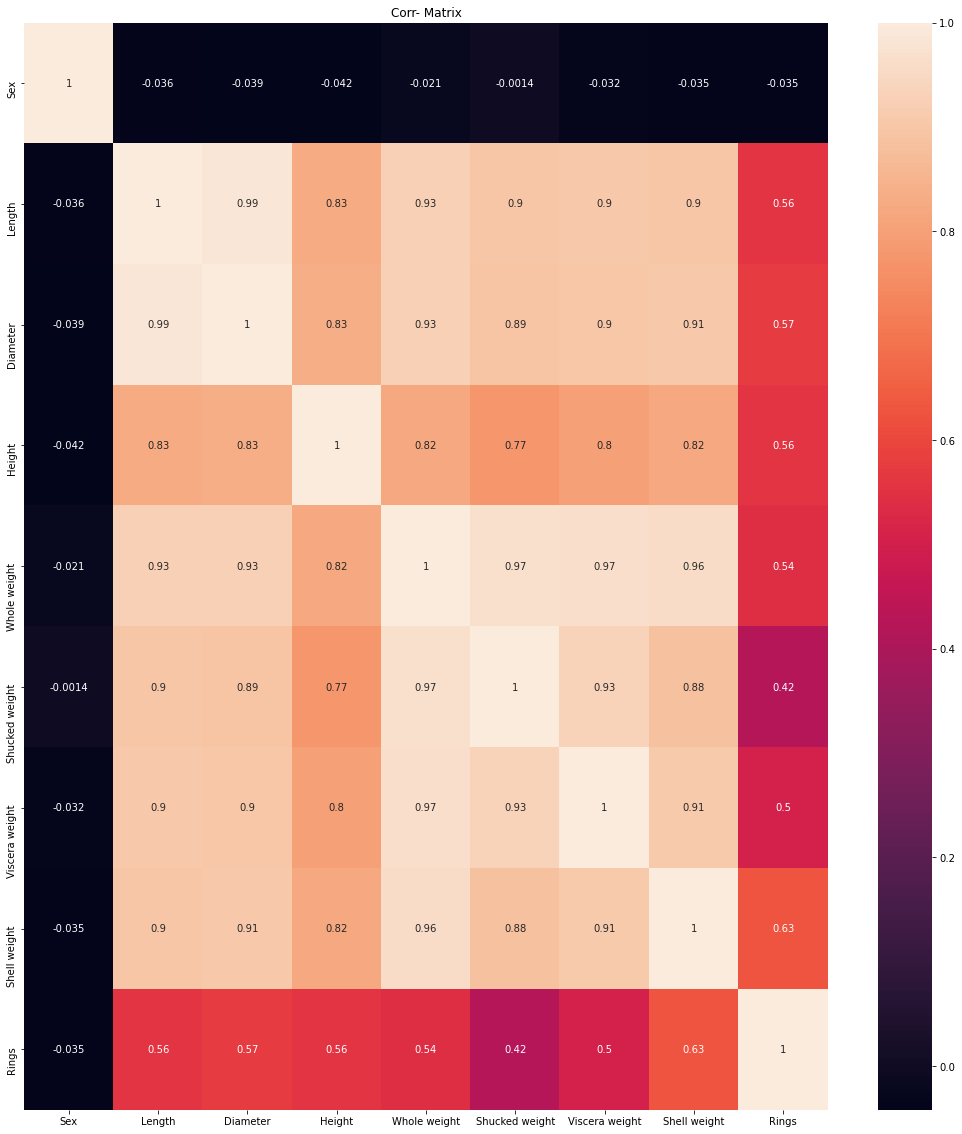

In [63]:
# Data is shewed in some segments 
#Checking correlarion and heat map 
df_corr = df.corr()
plt.figure(figsize=[18,20])
sns.heatmap(df_corr,annot=True)
plt.title('Corr- Matrix')
plt.show()

In [64]:
df_corr['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

In [106]:
# finding using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


Sex               2.0000
Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
Age               3.0000
dtype: float64


In [109]:
df_iqr.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [116]:
df_iqr.reset_index()
df_iqr.shape

(3781, 10)

###  Splitting data in X&Y also scale the data using standard scaler 

In [119]:
# Scale the data using standard scaler 
# Setting X and y axis and splitting the data into train and test respectively.
x = df_iqr.drop(['Rings','Age'],axis =1) 
y = df_iqr['Rings']

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [121]:
x.skew(0)

Sex              -0.097270
Length           -0.495017
Diameter         -0.481941
Height           -0.152640
Whole weight      0.345472
Shucked weight    0.455297
Viscera weight    0.454848
Shell weight      0.342490
dtype: float64

Finding Best Random state

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
my_acc = 0
rs = 0
for i in range (1,200) :
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.15,random_state=i)   
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred =lr.predict(x_test)
    acc= r2_score(y_test,y_pred)
    if acc>my_acc :
        my_acc =acc
        rs=i  
rs

88

In [123]:
#Thus SPlitting data 

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=88)  

In [124]:
#Using  Regression models 
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
R2_lr_score =r2_score(y_test,lr_y_pred)

print('R2_SCORE:',R2_lr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,lr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,lr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,lr_y_pred)))

R2_SCORE: 0.5121556922015172
Mean Absolute Error_LR: 1.2988407999632041
Mean Squared Error_LR: 2.8212986181605957
Root Mean Squared Error_LR: 1.679672175801158


In [125]:
#Using  XGB models 
import xgboost as  xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
xgb_y_pred = xgb.predict(x_test)
R2_xgb_score =r2_score(y_test,xgb_y_pred)
R2_xgb_score
print('R2_SCORE:',R2_xgb_score)
print('Mean Absolute Error_XGB:',mean_absolute_error(y_test,xgb_y_pred))
print('Mean Squared Error_XGB:', mean_squared_error(y_test,xgb_y_pred))
print('Root Mean Squared Error_XGB:', np.sqrt(mean_squared_error(y_test,xgb_y_pred)))

R2_SCORE: 0.5023891895993067
Mean Absolute Error_XGB: 1.301641061337509
Mean Squared Error_XGB: 2.877780204304798
Root Mean Squared Error_XGB: 1.6964021351981369


In [127]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt =dt.predict(x_test)
R2_DT_score =r2_score(y_test,y_pred_dt)
print('R2_SCORE_DT:',R2_DT_score)
print('Mean Absolute Error_DT:',mean_absolute_error(y_test,y_pred_dt))
print('Mean Squared Error_DT:', mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error_DT:', np.sqrt(mean_squared_error(y_test,y_pred_dt)))

R2_SCORE_DT: 0.14898492038180655
Mean Absolute Error_DT: 1.6334801762114537
Mean Squared Error_DT: 4.921585903083701
Root Mean Squared Error_DT: 2.2184647626418816


In [128]:
# USING SVM Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
svr_y_pred = svr.predict(x_test)
R2_svr_score =r2_score(y_test,svr_y_pred)
R2_svr_score
print('R2_SCORE:',R2_svr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,svr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,svr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,svr_y_pred)))

R2_SCORE: 0.5490273267386866
Mean Absolute Error_LR: 1.205298543851099
Mean Squared Error_LR: 2.6080627765075883
Root Mean Squared Error_LR: 1.614949775227573


In [129]:
from sklearn.model_selection import cross_val_score 
#Cross Validation 
cvLR =cross_val_score(lr,x,y,cv=5)
cvXGB =cross_val_score(xgb,x,y,cv=5)
cvSVR=cross_val_score(svr,x,y,cv=5)
cvDTR=cross_val_score(dt,x,y,cv=5)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score XGB',cvXGB.mean())
print ('\n CV score SVR',cvSVR.mean())
print ('\n CV score DTR',cvDTR.mean())


 CV score LR 0.414299992563834

 CV score XGB 0.4154840305527784

 CV score SVR 0.4527379866034903

 CV score DTR -0.03497507526640733


HyperParameter tuniing usog Grid Search

In [131]:
from sklearn.model_selection import GridSearchCV

param ={'C' :[1,1.1,1.2,1.21,1.23,1.25,2,27] ,'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
GSV = GridSearchCV(SVR(),param,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 1.1, 1.2, 1.21, 1.23, 1.25, 2, 27],
                         'coef0': [0.01, 10, 0.5], 'gamma': ('auto', 'scale')})

#### Best Parameters 

In [132]:
SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [133]:
GSV.best_params_

{'C': 2, 'coef0': 0.01, 'gamma': 'auto'}

In [144]:
#Using tuned parameters
from sklearn.svm import SVR
svr_t = SVR(C= 1.25,coef0= 0.01,gamma= 'auto')  #checking 
svr_t.fit(x_train, y_train)
svr_t_y_pred = svr_t.predict(x_test)
R2_svr_t_score =r2_score(y_test,svr_t_y_pred)
R2_svr_t_score
print('R2_SCORE_TUNED in precent :',R2_svr_score*100)
print('Mean Absolute Error_SVR_TUNED :',mean_absolute_error(y_test,svr_t_y_pred))
print('Mean Squared Error_SVR_TUNED :', mean_squared_error(y_test,svr_t_y_pred))
print('Root Mean Squared Error_SVR_TUNED :', np.sqrt(mean_squared_error(y_test,svr_t_y_pred)))


R2_SCORE_TUNED in precent : 54.90273267386866
Mean Absolute Error_SVR_TUNED : 1.2016130010341444
Mean Squared Error_SVR_TUNED : 2.5900558892783594
Root Mean Squared Error_SVR_TUNED : 1.6093650578033436


### EFFICIANCY ACHIEVED 

R2_SCORE_TUNED in precent : 54.90273267386866

Mean Absolute Error_SVR_TUNED : 1.2016130010341444

Mean Squared Error_SVR_TUNED : 2.5900558892783594

Root Mean Squared Error_SVR_TUNED : 1.6093650578033436



In [146]:
#Checking efficiancy in random 

print(svr_t_y_pred[:50],)
print(svr_y_pred[:50],)
print(y_test[:50].values)

[10.57191706  9.36683091  9.96383837  7.50145894  9.51000519  7.76589023
 12.15987715 11.1318293   9.93030862  6.44729254  8.24111492  6.38350934
  6.70976514 11.06319844  8.88286385 10.38997506  8.13314598  9.25094628
 11.20742927  5.3737943   8.56787529  8.53104302  6.93032813  9.47941805
 11.62416889 10.68638399 10.17985229 11.0763073  10.42628983  9.51474493
 11.10409127 10.47116222  8.83738752 10.62256618 10.43740777 10.72689863
 10.66420758 10.3855662   7.52580363  7.32332225 10.50622644  9.78251009
  7.95704723 11.0020763  11.1918049  10.29362984 10.69113014  9.71978668
  9.74236307  7.04217259]
[10.53514772  9.34328444  9.89849727  7.51278336  9.52903283  7.77526472
 12.12755631 11.11420147  9.92850826  6.45027708  8.24597364  6.38725283
  6.72940086 11.07891551  8.83777811 10.37652981  8.15095514  9.19405025
 11.16138352  5.38335531  8.56465814  8.52596106  6.93947097  9.46429218
 11.57405372 10.62383525 10.28824818 11.05558536 10.44009311  9.50455971
 11.0433487  10.49803039 

### Saving the model

In [147]:
#Dumping the model 
import joblib as jl
jl.dump(svr_t,'Abalone.pk')

['Abalone.pk']

In [148]:
#Loading the model 
abln_reg = jl.load('Abalone.pk')

In [154]:
Y_abln_reg = abln_reg.predict(x_test)
df_abln_reg = pd.DataFrame({})

df_abln_reg['Yabln_reg'] = Y_abln_reg
df_abln_reg

,Yabln_reg
0,10.571917
1,9.366831
2,9.963838
3,7.501459
4,9.510005
...,...
1130,9.634082
1131,11.044759
1132,9.488142
1133,10.577593
